In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

ERROR! Session/line number was not unique in database. History logging moved to new session 291


Exact Solution: 1 - x**2/2


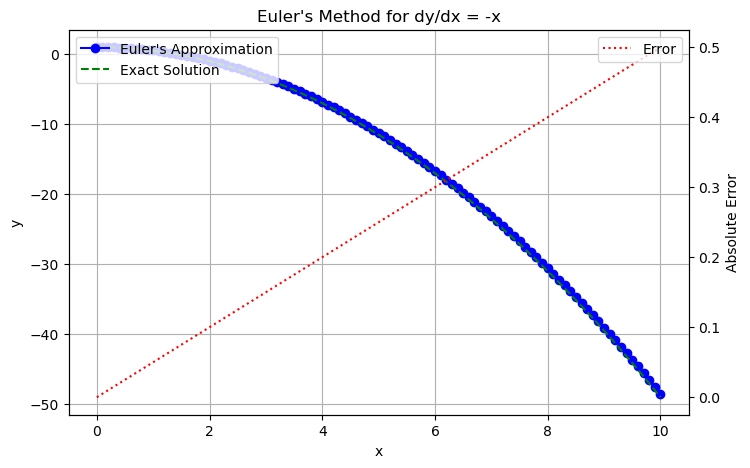

In [13]:
class ODEFunction:
    """Handles symbolic representation and evaluation of the ODE."""
    def __init__(self, equation_str):
        self.x, self.y = sp.symbols('x y')
        self.function = sp.simplify(equation_str)
    
    def evaluate(self, x_val, y_val):
        """Evaluates the function at given x and y values."""
        return float(self.function.subs({self.x: x_val, self.y: y_val}))

class ODESolver:
    """Solves ODEs using Euler's method and finds exact solutions."""
    def __init__(self, equation_str, x_0, y_0, x_end, step_size):
        self.ode_function = ODEFunction(equation_str)
        self.x_0, self.y_0, self.x_end, self.step_size = x_0, y_0, x_end, step_size
        self.x_values = np.arange(x_0, x_end + step_size, step_size)
        self.y_values = []
    
    def solve_euler(self):
        """Solves the ODE using Euler's method."""
        y_values = [self.y_0]
        for i in range(len(self.x_values) - 1):
            y_next = y_values[i] + self.step_size * self.ode_function.evaluate(self.x_values[i], y_values[i])
            y_values.append(y_next)
        self.y_values = y_values
        return self.x_values, self.y_values
    
    def solve_exact(self):
        """Finds the exact solution symbolically."""
        x, y = sp.symbols('x'), sp.Function('y')
        rhs = self.ode_function.function.subs({self.ode_function.y: y(x)})
        eq = sp.Eq(y(x).diff(x), rhs)
        solution = sp.dsolve(eq, y(x))
        
        general_solution = solution.rhs
        constants = list(general_solution.free_symbols - {x})
        if constants:
            C1 = constants[0]
            constant_eq = sp.Eq(general_solution.subs(x, self.x_0), self.y_0)
            constant_value = sp.solve(constant_eq, C1)
            if constant_value:
                particular_solution = general_solution.subs(C1, constant_value[0])
                return particular_solution.simplify()
        return general_solution

    def plot(self, exact_solution=None):
        """Plots Euler's method, exact solution, and error."""
        fig, ax1 = plt.subplots(figsize=(8, 5))
        ax1.plot(self.x_values, self.y_values, 'bo-', label="Euler's Approximation")
        
        if exact_solution:
            exact_func = sp.lambdify(sp.Symbol('x'), exact_solution, 'numpy')
            exact_values = exact_func(self.x_values)
            ax1.plot(self.x_values, exact_values, 'g--', label="Exact Solution")
            
            # Compute and plot error
            error = np.abs(np.array(self.y_values) - np.array(exact_values))
            ax2 = ax1.twinx()
            ax2.plot(self.x_values, error, 'r:', label="Error")
            ax2.set_ylabel("Absolute Error")
            ax2.legend(loc='upper right')
        
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax1.set_title(f"Euler's Method for dy/dx = {self.ode_function.function}")
        ax1.legend(loc='upper left')
        ax1.grid(True)
        plt.show()
    
    def least_squares(self):
        """Estimates k using the least squares optimisation"""
        pass

    def maximum_likelihood(self):
        """Estimates k using the maximum likelihood method"""

if __name__ == "__main__":
    equation_str = "-x"
    x_0, y_0 = 0, 1
    x_end, step_size = 10, 0.1

    solver = ODESolver(equation_str, x_0, y_0, x_end, step_size)
    solver.solve_euler()
    
    exact_solution = solver.solve_exact()
    print("Exact Solution:", exact_solution)
    
    solver.plot(exact_solution)


In [ ]:
# david's example
